In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter

In [2]:
# Load an image
img = cv2.imread('./data/grid_output/grid_0_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

In [3]:
# Gaussian Filter
gaussian_filtered =  cv2.GaussianBlur(img, (5,5), 0)

In [4]:
# Apply Median Filter
median_filtered = cv2.medianBlur(img, 5)  # 5 is the kernel size

In [43]:
# Apply Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(img, 5, 150, 150)
bilateral_filtered2 = cv2.bilateralFilter(img, 5, 75, 75)

In [40]:
import numpy as np
from scipy.ndimage import uniform_filter

def kuwahara_filter(image, window_size):
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    radius = window_size // 2
    rows, cols = image.shape[:2]
    pad_width = ((radius, radius), (radius, radius), (0, 0))
    padded = np.pad(image, pad_width, mode='reflect')
    
    result = np.zeros_like(image)

    means = uniform_filter(padded, size=window_size, mode='constant', cval=0.0)
    sqr_means = means**2
    uniform_filter(padded**2, size=window_size, mode='constant', cval=0.0)
    
    for i in range(4):
        if i == 0:   # Top-left
            kernel = np.ones((radius+1, radius+1, 1))
        elif i == 1: # Top-right
            kernel = np.ones((radius+1, radius, 1))
        elif i == 2: # Bottom-left
            kernel = np.ones((radius, radius+1, 1))
        else:        # Bottom-right
            kernel = np.ones((radius, radius, 1))
        
        kernel = kernel / np.sum(kernel)
        
        means = uniform_filter(padded, size=window_size, mode='constant', cval=0.0)
        sqr_means = uniform_filter(padded**2, size=window_size, mode='constant', cval=0.0)
        variances = sqr_means - means**2
        
        quadrant_means = uniform_filter(padded * kernel, size=window_size, mode='constant', cval=0.0)
        quadrant_variances = uniform_filter((padded**2) * kernel, size=window_size, mode='constant', cval=0.0) - quadrant_means**2
        
        temp_result = np.where(quadrant_variances < variances, quadrant_means, result)
        result = np.where(quadrant_variances < variances, temp_result, result)
    
    return result[radius:-radius, radius:-radius].astype(np.uint8)

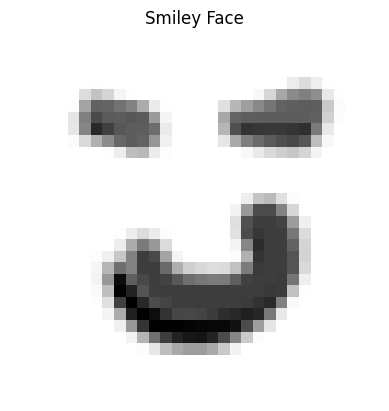

In [41]:
img = cv2.imread('./smiley_face.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis numbers
plt.title('Smiley Face')
plt.show()

In [77]:
from pprint import pprint

radius = 2
window_size = 3

kernel = np.ones((radius+1, radius+1, 1))
kernel = kernel / np.sum(kernel)

matrix = np.array([
    [[1, 2], [3, 4], [5, 6], [7, 8]],
    [[9, 10], [11, 12], [13, 14], [15, 16]],
    [[17, 18], [19, 20], [21, 22], [23, 24]],
    [[25, 26], [27, 28], [29, 30], [31, 32]]
])
matrix = matrix.reshape(4, 8)

pad_width = ((radius, radius), (radius, radius))
padded = np.pad(matrix, pad_width, mode='reflect')

result = np.zeros_like(matrix)

means = cv2.blur(padded, (3,3))
means2 = uniform_filter(padded, size=window_size, mode='constant', cval=0.0)
print(padded)
print(means2)
#uniform_filter(padded, size=window_size, mode='constant', cval=0.0)
# print(padded[radius:-radius, radius:-radius])
# print(means)

[[19 18 17 18 19 20 21 22 23 24 23 22]
 [11 10  9 10 11 12 13 14 15 16 15 14]
 [ 3  2  1  2  3  4  5  6  7  8  7  6]
 [11 10  9 10 11 12 13 14 15 16 15 14]
 [19 18 17 18 19 20 21 22 23 24 23 22]
 [27 26 25 26 27 28 29 30 31 32 31 30]
 [19 18 17 18 19 20 21 22 23 24 23 22]
 [11 10  9 10 11 12 13 14 15 16 15 14]]
[[ 6  9  8  9  9 10 11 11 12 12 12  8]
 [ 7 10  9 10 11 12 13 14 15 15 15  9]
 [ 5  7  6  7  8  9 10 11 12 12 12  7]
 [ 7 10  9 10 11 12 13 14 15 15 15  9]
 [12 18 17 18 19 20 21 22 23 23 23 15]
 [13 20 19 20 21 22 23 24 25 25 25 16]
 [12 18 17 18 19 20 21 22 23 23 23 15]
 [ 6  9  8  9  9 10 11 11 12 12 12  8]]


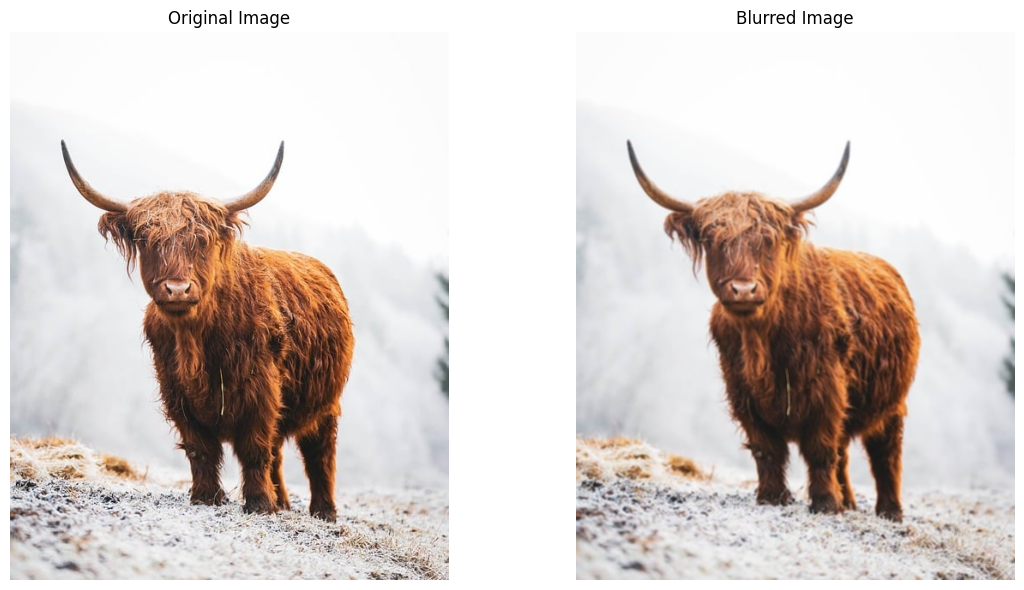

In [70]:
cattle_bgr = cv2.imread('./highland-cattle-8183107_640.jpg')
cattle = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cattle_blur = cv2.blur(cattle, (3,3))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display original image
ax1.imshow(cattle)
ax1.set_title('Original Image')
ax1.axis('off')

# Display blurred image
ax2.imshow(cattle_blur)
ax2.set_title('Blurred Image')
ax2.axis('off')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [45]:
# Apply Kuwahara Filter
kuwahara_filtered = kuwahara_filter(img, 5)

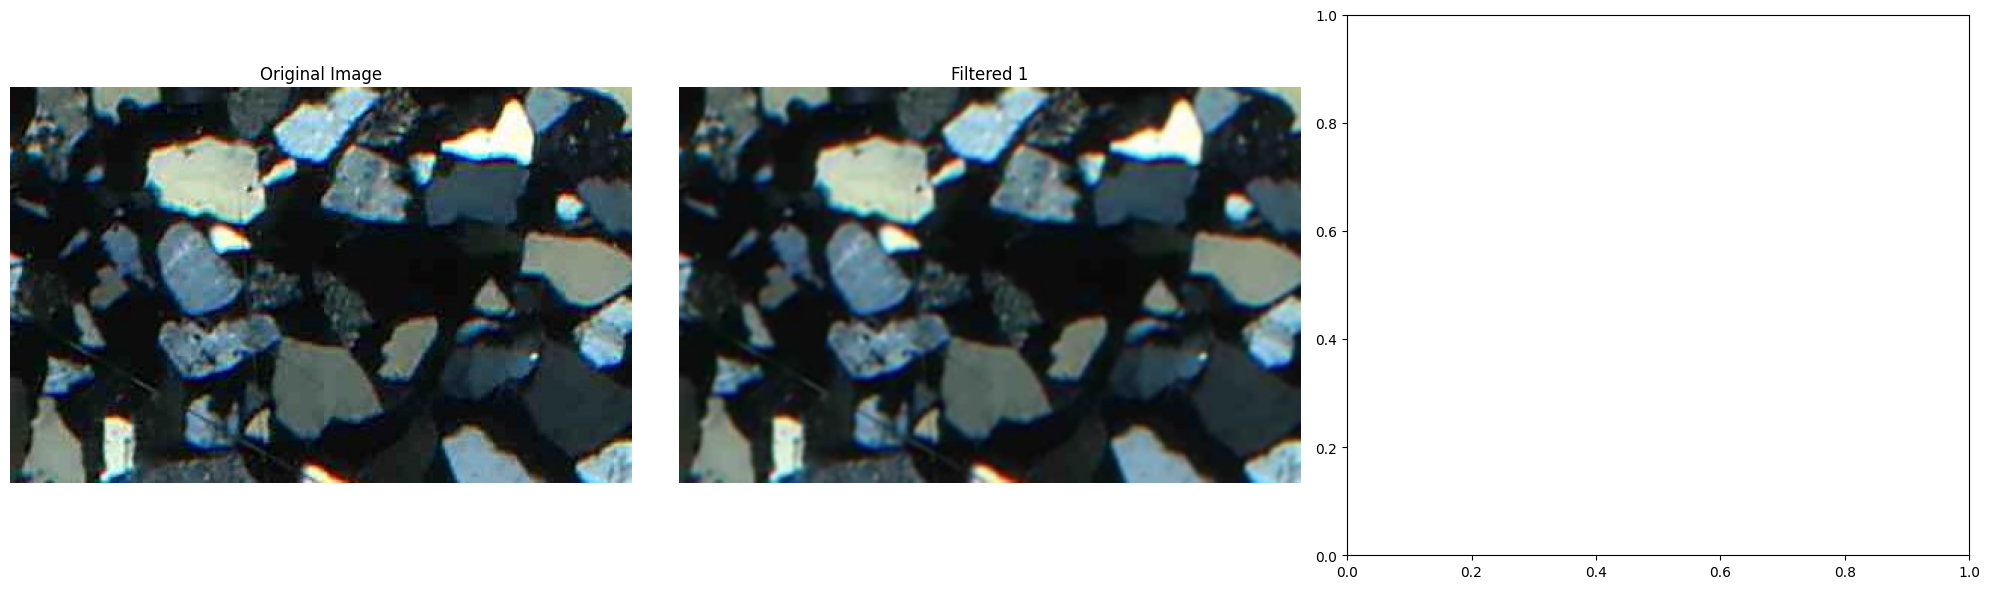

In [7]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Display original image
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display first filtered image
axes[1].imshow(gaussian_filtered)
axes[1].set_title('Filtered 1')
axes[1].axis('off')

# # Display second filtered image
# axes[2].imshow(kuwahara_filtered)
# axes[2].set_title('Filtered 2')
# axes[2].axis('off')

plt.tight_layout()
plt.show()

In [50]:
img.shape

(262, 412, 3)